See <a href="http://www.japersrink.com/2015/7/15/8920179/washington-capitals-spending-in-the-salary-cap-era">here</a>.

### Setup

In [1]:
r = open('/Users/muneebalam/Desktop/Quick access/nhl salary info.csv', 'r') #data from USA Today and WAR On Ice
data = r.read().split('\n')[1:]
r.close()

data2 = []
include_outliers = False
for i in range(len(data)):
    line = data[i].split(',')
    yr = int(line[0])
    team = line[1]
    salary = int(line[2][2:]) + int(line[3]) / 1000 + int(line[4][:-1]) / 1000000
    wins = int(line[5])
    ties = int(line[6])
    if not yr == 2004:
        if include_outliers or (
                not (team == 'Rangers' and 2000 <= yr <= 2003) and not (yr == 2006 and team == 'Penguins') and \
                not (yr == 2012 and team in ['Penguins', 'Blackhawks'])):
            data2.append([yr, team, salary, wins + ties / 2])

salaries_by_year = {}
team_order_by_year = {}
team_wins_by_year = {}
each_team_wins_by_year = {}
for line in data2:
    if line[1] not in each_team_wins_by_year:
        each_team_wins_by_year[line[1]] = {}
    if line[0] not in salaries_by_year:
        salaries_by_year[line[0]] = []
        team_order_by_year[line[0]] = []
        team_wins_by_year[line[0]] = []
    salaries_by_year[line[0]].append(line[2])
    team_order_by_year[line[0]].append(line[1])
    if line[0] == 2012:
        team_wins_by_year[line[0]].append(line[3] * 82 / 48)
        each_team_wins_by_year[line[1]][line[0]] = line[3] * 82 / 48
    else:
        team_wins_by_year[line[0]].append(line[3])
        each_team_wins_by_year[line[1]][line[0]] = line[3]

import numpy as np
import scipy.stats as ss
yearly_means = {yr: np.mean(salaries_by_year[yr]) for yr in salaries_by_year}
yearly_sds = {yr: np.std(salaries_by_year[yr]) for yr in salaries_by_year}
yearly_zscores = {yr: ss.zscore(salaries_by_year[yr]) for yr in salaries_by_year}
team_yearly_zscores = {}

for team in each_team_wins_by_year:
    team_yearly_zscores[team] = {}

for season in yearly_zscores:
    for i in range(len(yearly_zscores[season])):
        team_yearly_zscores[team_order_by_year[season][i]][season] = yearly_zscores[season][i]

import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as ss
import GetPbP
import PbPMethods2 as pm2

xmin = -3
xmax = 3
ymin = 20
ymax = 60

### By season

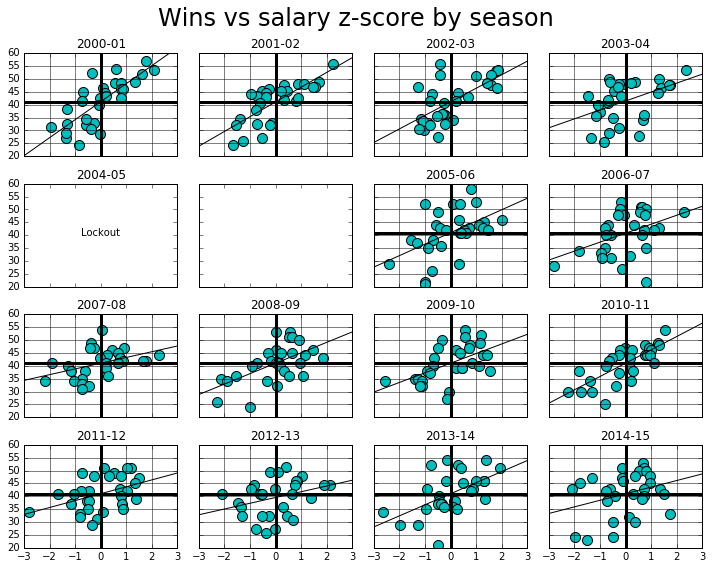

In [2]:
for fit_power in range(1, 2):
    fig, axes = plt.subplots(4, 4, sharex=True, sharey=True, figsize=[10, 8])
    for yr in range(2000, 2015):
        col = yr - 2000
        if yr > 2004:
            col += 1
        row = int(col / 4)
        col = col % 4
        axes[row][col].set_title('{0:d}-{1:s}'.format(yr, str(yr + 1)[2:]))
        if yr == 2004:
            axes[row][col].annotate('Lockout', xy=(0, 41), va='center', ha='center')
        else:
            allzs = yearly_zscores[yr]
            allws = np.array(team_wins_by_year[yr])
            axes[row][col].scatter(allzs, allws, s=100, c='c')
            fit = np.polyfit(allzs, allws, fit_power)
            fit_fn = np.poly1d(fit)
            xnew = np.linspace(xmin, xmax)
            ynew = np.array([fit_fn(x) for x in xnew])
            axes[row][col].plot(xnew, ynew, c='k')
            axes[row][col].grid(b=True, which='major', axis='x', linestyle='-')
            axes[row][col].grid(b=True, which='major', axis='y', linestyle='-')
            axes[row][col].plot([xmin, xmax], [41, 41], linewidth=3, color='black')
            axes[row][col].plot([0, 0], [ymin, ymax], linewidth=3, color='black')
        axes[row][col].set_ylim(ymin, ymax)
        axes[row][col].set_xlim(xmin, xmax)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.text(0.5, 0.98, 'Wins vs salary z-score by season', va='top', ha='center', fontsize=24)

### Three time period graph

B1 m, b, r, p, e = LinregressResult(slope=5.3670339270324314, intercept=41.219827586206897, rvalue=0.65597693188027051, pvalue=1.3255828266618962e-15, stderr=0.57838133778491019)
B2 m, b, r, p, e = LinregressResult(slope=3.5909303288734482, intercept=40.959731543624159, rvalue=0.48734031280051027, pvalue=2.9201722839636191e-10, stderr=0.53068368070454885)
B3 m, b, r, p, e = LinregressResult(slope=3.6790398460967237, intercept=41.0, rvalue=0.49827585684737008, pvalue=6.9921261632850818e-09, stderr=0.58932115843181587)
short season m, b, r, p, e = LinregressResult(slope=2.2357128485286752, intercept=39.535714285714285, rvalue=0.31431112717806936, pvalue=0.10332642561130237, stderr=1.3242873663732739)


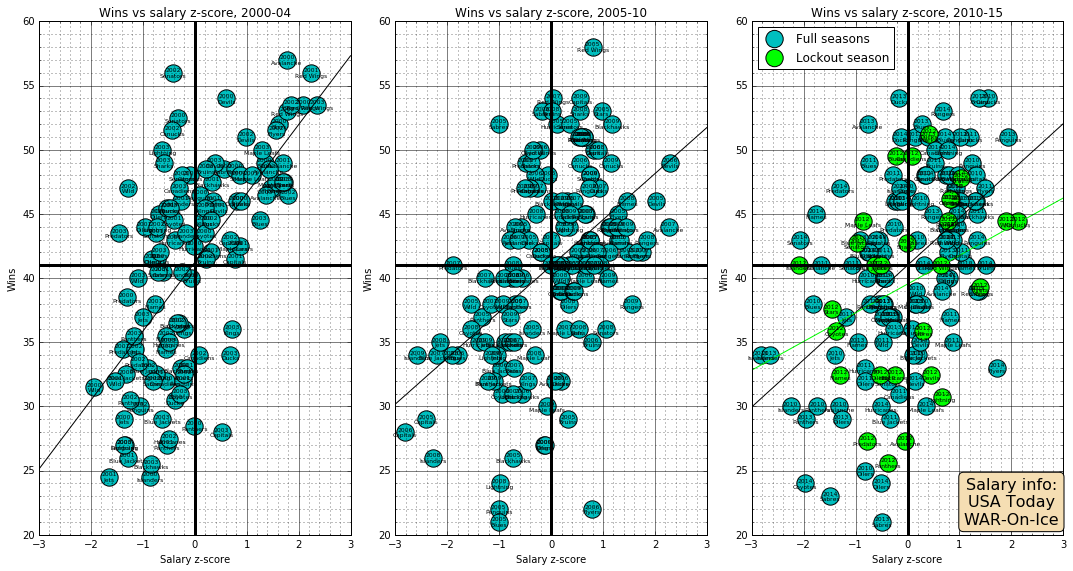

In [3]:
for fit_power in range(1, 2):
    fig = plt.figure(figsize=[15, 8])

    plt.subplot(131)
    plt.title('Wins vs salary z-score, 2000-04')
    allzs = np.array([])
    allws = np.array([])
    for yr in range(2000, 2004):
        allzs = np.concatenate((allzs, yearly_zscores[yr]))
        allws = np.concatenate((allws, np.array(team_wins_by_year[yr])))
        for i in range(len(team_wins_by_year[yr])):
            if team_wins_by_year[yr][i] < ymin:
                textloc_y = team_wins_by_year[yr][i] + 3
                end_arrow_y = ymin
            elif team_wins_by_year[yr][i] > ymax:
                textloc_y = team_wins_by_year[yr][i] - 3
                end_arrow_y = ymax
            else:
                textloc_y = team_wins_by_year[yr][i]
                end_arrow_y = team_wins_by_year[yr][i]
            if yearly_zscores[yr][i] < xmin:
                textloc_x = yearly_zscores[yr][i] + 0.5
                end_arrow_x = xmin
            elif yearly_zscores[yr][i] > xmax:
                textloc_x = yearly_zscores[yr][i] - 0.5
                end_arrow_x = xmax
            else:
                textloc_x = yearly_zscores[yr][i]
                end_arrow_x = yearly_zscores[yr][i]
            if textloc_x == yearly_zscores[yr][i] and textloc_y == team_wins_by_year[yr][i]:
                plt.annotate('{1:d}\n{0:s}'.format(team_order_by_year[yr][i], yr),
                             xy=(yearly_zscores[yr][i], team_wins_by_year[yr][i]),
                             xytext=(textloc_x, textloc_y),
                             ha='center', va='center', fontsize=6)
            else:
                plt.annotate('{1:d}\n{0:s}'.format(team_order_by_year[yr][i], yr),
                             xy=(end_arrow_x, end_arrow_y), xytext=(textloc_x, textloc_y),
                             ha='center', va='center', fontsize=6,
                             arrowprops=dict(facecolor='black', shrink=0.05))

    plt.scatter(allzs, allws, s=300, c='c')
    fit = np.polyfit(allzs, allws, fit_power)
    fit_fn = np.poly1d(fit)
    xnew = np.linspace(xmin, xmax)
    ynew = np.array([fit_fn(x) for x in xnew])
    if fit_power == 1:
        stats = ss.linregress(allzs, allws)
        print('B1 m, b, r, p, e = {0:s}'.format(str(stats)))
    plt.plot(xnew, ynew, c='k')
    plt.xlabel('Salary z-score')
    plt.ylabel('Wins')
    plt.grid(b=True, which='major', axis='x', linestyle='-')
    plt.grid(b=True, which='major', axis='y', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', axis='x', linestyle=':')
    plt.grid(b=True, which='minor', axis='y', linestyle=':')
    plt.plot([xmin, xmax], [41, 41], linewidth=3, color='black')
    plt.plot([0, 0], [ymin, ymax], linewidth=3, color='black')
    plt.ylim(ymin, ymax)
    plt.xlim(xmin, xmax)

    plt.subplot(132)
    plt.title('Wins vs salary z-score, 2005-10')
    allzs = np.array([])
    allws = np.array([])
    for yr in range(2005, 2010):
        allzs = np.concatenate((allzs, yearly_zscores[yr]))
        allws = np.concatenate((allws, np.array(team_wins_by_year[yr])))
        for i in range(len(team_wins_by_year[yr])):
            if team_wins_by_year[yr][i] < ymin:
                textloc_y = team_wins_by_year[yr][i] + 3
                end_arrow_y = ymin
            elif team_wins_by_year[yr][i] > ymax:
                textloc_y = team_wins_by_year[yr][i] - 3
                end_arrow_y = ymax
            else:
                textloc_y = team_wins_by_year[yr][i]
                end_arrow_y = team_wins_by_year[yr][i]
            if yearly_zscores[yr][i] < xmin:
                textloc_x = yearly_zscores[yr][i] + 0.5
                end_arrow_x = xmin
            elif yearly_zscores[yr][i] > xmax:
                textloc_x = yearly_zscores[yr][i] - 0.5
                end_arrow_x = xmax
            else:
                textloc_x = yearly_zscores[yr][i]
                end_arrow_x = yearly_zscores[yr][i]
            if textloc_x == yearly_zscores[yr][i] and textloc_y == team_wins_by_year[yr][i]:
                plt.annotate('{1:d}\n{0:s}'.format(team_order_by_year[yr][i], yr),
                             xy=(yearly_zscores[yr][i], team_wins_by_year[yr][i]),
                             xytext=(textloc_x, textloc_y),
                             ha='center', va='center', fontsize=6)
            else:
                plt.annotate('{1:d}\n{0:s}'.format(team_order_by_year[yr][i], yr),
                             xy=(end_arrow_x, end_arrow_y), xytext=(textloc_x, textloc_y),
                             ha='center', va='center', fontsize=6,
                             arrowprops=dict(facecolor='black', shrink=0.05))

    plt.scatter(allzs, allws, s=300, c='c')
    fit = np.polyfit(allzs, allws, fit_power)
    fit_fn = np.poly1d(fit)
    if fit_power == 1:
        stats = ss.linregress(allzs, allws)
        print('B2 m, b, r, p, e = {0:s}'.format(str(stats)))
    xnew = np.linspace(xmin, xmax)
    ynew = np.array([fit_fn(x) for x in xnew])
    plt.plot(xnew, ynew, c='k')
    plt.xlabel('Salary z-score')
    plt.ylabel('Wins')
    plt.grid(b=True, which='major', axis='x', linestyle='-')
    plt.grid(b=True, which='major', axis='y', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', axis='x', linestyle=':')
    plt.grid(b=True, which='minor', axis='y', linestyle=':')
    plt.plot([xmin, xmax], [41, 41], linewidth=3, color='black')
    plt.plot([0, 0], [ymin, ymax], linewidth=3, color='black')
    plt.ylim(ymin, ymax)
    plt.xlim(xmin, xmax)

    plt.subplot(133)
    plt.title('Wins vs salary z-score, 2010-15')
    allzs = np.array([])
    allws = np.array([])
    for yr in range(2010, 2015):
        if not yr == 2012:
            allzs = np.concatenate((allzs, yearly_zscores[yr]))
            allws = np.concatenate((allws, np.array(team_wins_by_year[yr])))
            for i in range(len(team_wins_by_year[yr])):
                if team_wins_by_year[yr][i] < ymin:
                    textloc_y = team_wins_by_year[yr][i] + 3
                    end_arrow_y = ymin
                elif team_wins_by_year[yr][i] > ymax:
                    textloc_y = team_wins_by_year[yr][i] - 3
                    end_arrow_y = ymax
                else:
                    textloc_y = team_wins_by_year[yr][i]
                    end_arrow_y = team_wins_by_year[yr][i]
                if yearly_zscores[yr][i] < xmin:
                    textloc_x = yearly_zscores[yr][i] + 0.5
                    end_arrow_x = xmin
                elif yearly_zscores[yr][i] > xmax:
                    textloc_x = yearly_zscores[yr][i] - 0.5
                    end_arrow_x = xmax
                else:
                    textloc_x = yearly_zscores[yr][i]
                    end_arrow_x = yearly_zscores[yr][i]
                if textloc_x == yearly_zscores[yr][i] and textloc_y == team_wins_by_year[yr][i]:
                    plt.annotate('{1:d}\n{0:s}'.format(team_order_by_year[yr][i], yr),
                                 xy=(yearly_zscores[yr][i], team_wins_by_year[yr][i]),
                                 xytext=(textloc_x, textloc_y),
                                 ha='center', va='center', fontsize=6)
                else:
                    plt.annotate('{1:d}\n{0:s}'.format(team_order_by_year[yr][i], yr),
                                 xy=(end_arrow_x, end_arrow_y), xytext=(textloc_x, textloc_y),
                                 ha='center', va='center', fontsize=6,
                                 arrowprops=dict(facecolor='black', shrink=0.05))

    plt.scatter(allzs, allws, s=300, c='c', label='Full seasons')
    fit = np.polyfit(allzs, allws, fit_power)
    fit_fn = np.poly1d(fit)
    if fit_power == 1:
        stats = ss.linregress(allzs, allws)
        print('B3 m, b, r, p, e = {0:s}'.format(str(stats)))
    xnew = np.linspace(xmin, xmax)
    ynew = np.array([fit_fn(x) for x in xnew])
    plt.plot(xnew, ynew, c='k')
    allzs = np.array([])
    allws = np.array([])
    for yr in range(2012, 2013):
        if yr == 2012:
            allzs = np.concatenate((allzs, yearly_zscores[yr]))
            allws = np.concatenate((allws, np.array(team_wins_by_year[yr])))
            for i in range(len(team_wins_by_year[yr])):
                if team_wins_by_year[yr][i] < ymin:
                    textloc_y = team_wins_by_year[yr][i] + 3
                    end_arrow_y = ymin
                elif team_wins_by_year[yr][i] > ymax:
                    textloc_y = team_wins_by_year[yr][i] - 3
                    end_arrow_y = ymax
                else:
                    textloc_y = team_wins_by_year[yr][i]
                    end_arrow_y = team_wins_by_year[yr][i]
                if yearly_zscores[yr][i] < xmin:
                    textloc_x = yearly_zscores[yr][i] + 0.5
                    end_arrow_x = xmin
                elif yearly_zscores[yr][i] > xmax:
                    textloc_x = yearly_zscores[yr][i] - 0.5
                    end_arrow_x = xmax
                else:
                    textloc_x = yearly_zscores[yr][i]
                    end_arrow_x = yearly_zscores[yr][i]
                if textloc_x == yearly_zscores[yr][i] and textloc_y == team_wins_by_year[yr][i]:
                    plt.annotate('{1:d}\n{0:s}'.format(team_order_by_year[yr][i], yr),
                                 xy=(yearly_zscores[yr][i], team_wins_by_year[yr][i]),
                                 xytext=(textloc_x, textloc_y),
                                 ha='center', va='center', fontsize=6)
                else:
                    plt.annotate('{1:d}\n{0:s}'.format(team_order_by_year[yr][i], yr),
                                 xy=(end_arrow_x, end_arrow_y), xytext=(textloc_x, textloc_y),
                                 ha='center', va='center', fontsize=6,
                                 arrowprops=dict(facecolor='black', shrink=0.05))

    plt.scatter(allzs, allws, s=300, c='lime', label='Lockout season')
    fit = np.polyfit(allzs, allws, fit_power)
    fit_fn = np.poly1d(fit)
    if fit_power == 1:
        stats = ss.linregress(allzs, allws)
        print('short season m, b, r, p, e = {0:s}'.format(str(stats)))
    xnew = np.linspace(xmin, xmax)
    ynew = np.array([fit_fn(x) for x in xnew])
    plt.plot(xnew, ynew, c='lime')
    plt.xlabel('Salary z-score')
    plt.ylabel('Wins')
    plt.grid(b=True, which='major', axis='x', linestyle='-')
    plt.grid(b=True, which='major', axis='y', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', axis='x', linestyle=':')
    plt.grid(b=True, which='minor', axis='y', linestyle=':')
    plt.plot([xmin, xmax], [41, 41], linewidth=3, color='black')
    plt.plot([0, 0], [ymin, ymax], linewidth=3, color='black')
    plt.ylim(ymin, ymax)
    plt.xlim(xmin, xmax)
    plt.legend(loc=2, scatterpoints=1)
    plt.tight_layout()
    plt.annotate('Salary info:\nUSA Today\nWAR-On-Ice', ha='center', va='top', xy=(2, 24.5),
                 bbox=dict(boxstyle='round', facecolor='wheat', edgecolor='black'), fontsize=16)

    """No outliers
    B1 m, b, r, p, e = (5.3670339270324314, 41.219827586206897, 0.65597693188027051, 1.3255828266618962e-15, 0.57838133778491019)
    B2 m, b, r, p, e = (3.5909303288734478, 40.959731543624159, 0.48734031280051021, 2.9201722839636408e-10, 0.53068368070454885)
    B3 m, b, r, p, e = (3.6790398460967233, 41.000000000000007, 0.49827585684737002, 6.992126163285081e-09, 0.58932115843181598)
    short season m, b, r, p, e = (2.2357128485286761, 39.535714285714285, 0.31431112717806942, 0.10332642561130229, 1.3242873663732742)

    Outliers included
    B1 m, b, r, p, e = (4.483138138157913, 41.020833333333336, 0.55127271649479204, 6.8131263016057747e-11, 0.62461143903381156)
    B2 m, b, r, p, e = (3.3367798398875141, 41.0, 0.45335120400689011, 5.6875803479758961e-09, 0.53926397307670215)
    B3 m, b, r, p, e = (3.6790398460967233, 41.000000000000007, 0.49827585684737002, 6.992126163285081e-09, 0.58932115843181598)
    short season m, b, r, p, e = (4.0897322810716377, 41.0, 0.46534241632877921, 0.0095622390265499638, 1.4701127676338188)
    """

### All team graph

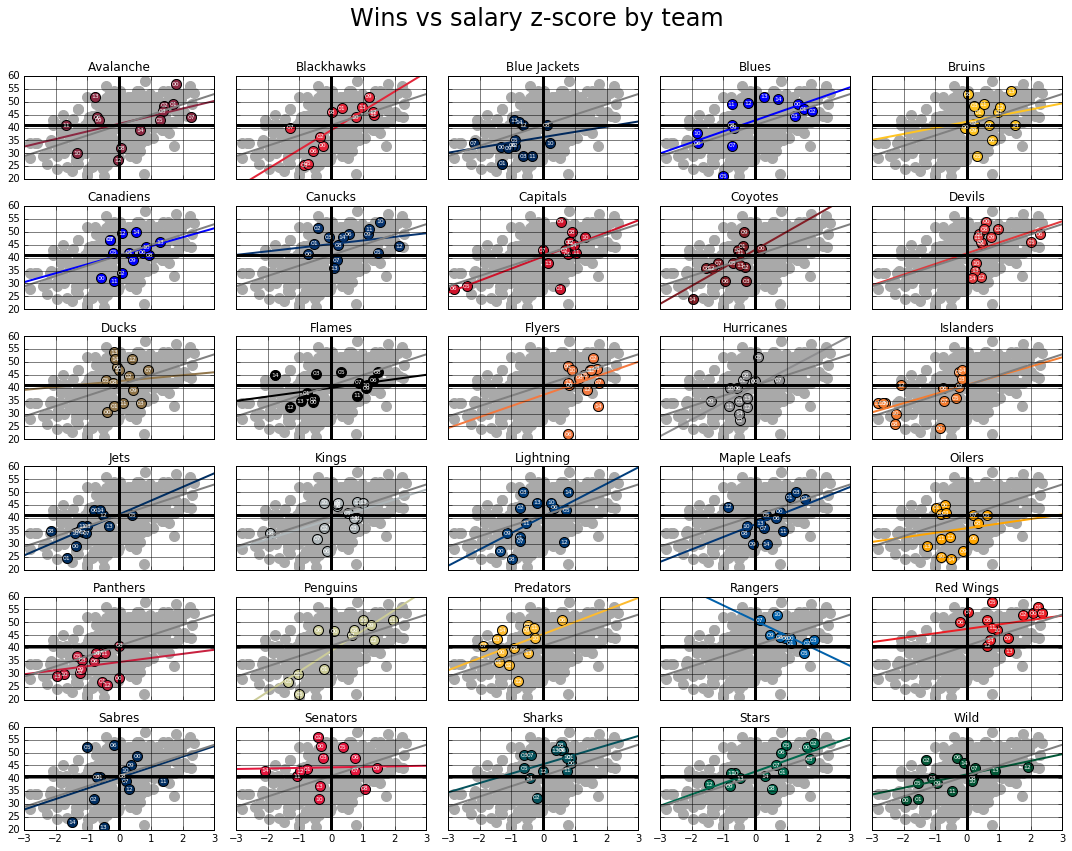

In [4]:
allzs = np.array([])
allws = np.array([])
for yr in yearly_zscores:
    allzs = np.concatenate((allzs, yearly_zscores[yr]))
    allws = np.concatenate((allws, team_wins_by_year[yr]))
truefit = np.polyfit(allzs, allws, fit_power)
truefit_fn = np.poly1d(truefit)
truex = np.linspace(xmin, xmax)
truey = np.array([truefit_fn(x) for x in truex])

teams2 = {t: GetPbP.get_mascot_name(t) for t in pm2.get_teams(2014)}
mascot_dct = {}
for t in teams2:
    mascot_dct[teams2[t]] = t
teams = [teams2[t] for t in teams2]
teams.sort()
teams = np.array(teams)

fig, axes = plt.subplots(6, 5, sharex=True, sharey=True, figsize=[15, 12])
for t in range(30):
    col = t
    row = int(col / 5)
    col = col % 5
    axes[row][col].set_title('{0:s}'.format(teams[t]))
    yrs_of_data = []
    for yr in yearly_zscores:
        if yr in team_yearly_zscores[teams[t]]:
            yrs_of_data.append(yr)
    zs = np.array([team_yearly_zscores[teams[t]][yr] for yr in yrs_of_data])
    ws = np.array([each_team_wins_by_year[teams[t]][yr] for yr in yrs_of_data])
    axes[row][col].scatter(allzs, allws, s=100, color='darkgray')
    color = GetPbP.get_team_colors(mascot_dct[teams[t]])[0]
    axes[row][col].scatter(zs, ws, s=100, c=color)
    fit = np.polyfit(zs, ws, fit_power)
    fit_fn = np.poly1d(fit)
    ynew = np.array([fit_fn(x) for x in truex])
    axes[row][col].plot(truex, ynew, c=color, linewidth=2)
    axes[row][col].plot(truex, truey, c='gray', linewidth=2)
    for yr in yearly_zscores:
        i = yr - 2000
        if yr > 2004:
            i -= 1
        try:
            axes[row][col].annotate('{0:s}'.format(str(yr)[2:]), ha='center', va='center',
                                xy=(zs[i], ws[i]), fontsize=6, color='white')
        except IndexError:
            pass
    axes[row][col].grid(b=True, which='major', axis='x', linestyle='-')
    axes[row][col].grid(b=True, which='major', axis='y', linestyle='-')
    axes[row][col].plot([xmin, xmax], [41, 41], linewidth=3, color='black')
    axes[row][col].plot([0, 0], [ymin, ymax], linewidth=3, color='black')
    axes[row][col].set_ylim(ymin, ymax)
    axes[row][col].set_xlim(xmin, xmax)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.text(0.5, 0.98, 'Wins vs salary z-score by team', va='top', ha='center', fontsize=24)

### Single-team graph

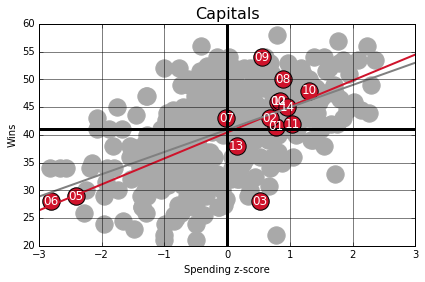

In [5]:
team = 'Capitals'
allzs = np.array([])
allws = np.array([])
for yr in yearly_zscores:
    allzs = np.concatenate((allzs, yearly_zscores[yr]))
    allws = np.concatenate((allws, team_wins_by_year[yr]))
truefit = np.polyfit(allzs, allws, fit_power)
truefit_fn = np.poly1d(truefit)

teams2 = {t: GetPbP.get_mascot_name(t) for t in pm2.get_teams(2014)}
mascot_dct = {}
for t in teams2:
    mascot_dct[teams2[t]] = t
teams = [teams2[t] for t in teams2]
teams.sort()
teams = np.array(teams)

plt.title(team, fontsize=16)
zs = np.array([team_yearly_zscores[team][yr] for yr in yearly_zscores])
ws = np.array([each_team_wins_by_year[team][yr] for yr in yearly_zscores])
plt.scatter(allzs, allws, s=300, color='darkgray')
color = GetPbP.get_team_colors(mascot_dct[team])[0]
plt.scatter(zs, ws, s=300, c=color)
fit = np.polyfit(zs, ws, fit_power)
fit_fn = np.poly1d(fit)
xnew = np.linspace(xmin, xmax)
ynew = np.array([fit_fn(x) for x in xnew])
plt.plot(xnew, ynew, c=color, linewidth=2)
ynew = np.array([truefit_fn(x) for x in xnew])
plt.plot(xnew, ynew, c='gray', linewidth=2)
for yr in yearly_zscores:
    i = yr - 2000
    if yr > 2004:
        i -= 1
    plt.annotate('{0:s}'.format(str(yr)[2:]), ha='center', va='center',
                 xy=(zs[i], ws[i]), fontsize=12, color='white')
plt.grid(b=True, which='major', axis='x', linestyle='-')
plt.grid(b=True, which='major', axis='y', linestyle='-')
plt.plot([xmin, xmax], [41, 41], linewidth=3, color='black')
plt.plot([0, 0], [ymin, ymax], linewidth=3, color='black')
plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
plt.xlabel('Spending z-score')
plt.ylabel('Wins')
plt.tight_layout()

### Pie chart

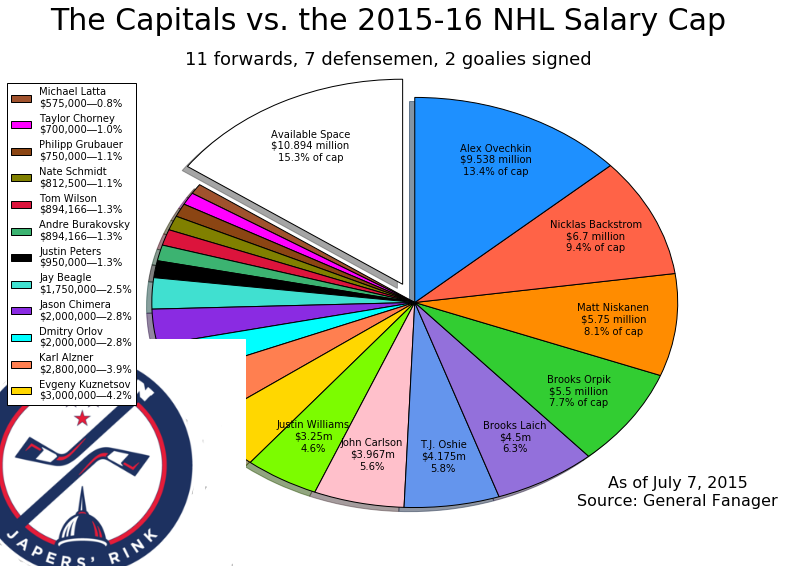

In [6]:
import matplotlib.pyplot as plt
from matplotlib._png import read_png
from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, \
    AnnotationBbox

title = 'The Capitals vs. the 2015-16 NHL Salary Cap'

fig = plt.figure(figsize=[11, 8])

date = 'As of July 7, 2015'
subhead = '11 forwards, 7 defensemen, 2 goalies signed'
credit = 'Source: General Fanager'

centerx = -0.1

plt.text(1, -0.88, date, va='center', ha='center', fontsize=16)
plt.text(1, -0.97, credit, va='center', ha='center', fontsize=16)

plt.text(centerx, 1.3, title, ha='center', va='bottom', fontsize=30)
plt.text(centerx, 1.16, subhead, ha='center', fontsize=18)

imagefile = '/Users/muneebalam/Desktop/Quick access/japersrink logo.png'
# image = plt.imread(imagefile)
# plt.imshow(image)

arr_lena = read_png(imagefile)
imagebox = OffsetImage(arr_lena, zoom=0.8)
xy = [-1.25, -0.8]
ab = AnnotationBbox(imagebox, xy,
                    boxcoords="offset points", bboxprops=dict(color='white'),
                    pad=0)
plt.gca().add_artist(ab)
plt.draw()

caphits = [9.538, 6.7, 5.75, 5.5,
           4.5, 4.175, 3.967, 3.25, 3,
           2.8, 2, 2, 1.75, .95,
           .894166, .894166, .812500, .75,
           .7, .575]
names = ['Alex Ovechkin', 'Nicklas Backstrom', 'Matt Niskanen', 'Brooks Orpik',
         'Brooks Laich', 'T.J. Oshie', 'John Carlson', 'Justin Williams', 'Evgeny Kuznetsov',
         'Karl Alzner', 'Dmitry Orlov', 'Jason Chimera', 'Jay Beagle', 'Justin Peters',
         'Andre Burakovsky', 'Tom Wilson', 'Nate Schmidt', 'Philipp Grubauer',
         'Taylor Chorney', 'Michael Latta']
colors = ['dodgerblue', 'tomato', 'darkorange', 'limegreen',
          'mediumpurple', 'cornflowerblue', 'pink', 'lawngreen', 'gold',
          'coral', 'cyan', 'blueviolet', 'turquoise', 'black',
          'mediumseagreen', 'crimson', 'olive', 'saddlebrown',
          'fuchsia', 'sienna']
# addt'l colors for 92/70/90: olive, forestgreen, rosybrown, saddlebrown, chocolate, hotpink
capceiling = 71.4
caphits.append(capceiling - sum(caphits))
names.append('Available Space')
colors.append('w')

labels = []

lim = 3

for i in range(len(caphits) - 1):
    if caphits[i] > lim:
        if caphits[i] >= 5:
            labels.append('${0:s} million\n{1:.1f}% of cap'.format(str(caphits[i]), caphits[i] * 100 / capceiling))
        else:
            labels.append('${0:s}m\n{1:.1f}%'.format(str(caphits[i]), caphits[i] * 100 / capceiling))
    else:
        labels.append('')
        # num = str(caphits[i] * 1000000)
        # labels.append('${0:s},{1:s}\t{2:.1f}%'.format(num[:3], num[3:], caphits[i] * 100/capceiling))
if caphits[-1] > 1:
    labels.append('${0:.3f} million\n{1:.1f}% of cap'.format(caphits[-1], caphits[-1] * 100 / capceiling))
else:
    num = str(caphits[-1] * 1000000)
    labels.append('${0:s},{1:s}\n{2:.1f}% of cap'.format(num[:3], num[3:6], caphits[-1] * 100 / capceiling))

labels = ['{0:s}\n{1:s}'.format(names[i], labels[i]) if caphits[i] > lim else '' for i in range(len(names))]

expl = []
for i in range(len(colors) - 1):
    expl.append(0)
expl.append(0.1)

labels.reverse()
caphits.reverse()
colors.reverse()
expl.reverse()
names.reverse()

patches, texts = plt.pie(caphits, labels=labels, colors=colors, startangle=90, labeldistance=0.76, explode=expl,
                         shadow=True)

for i, t in enumerate(texts):
    if caphits[i] > lim:
        t.set_horizontalalignment('center')
        t.set_verticalalignment('center')
    else:
        t.set_horizontalalignment('left')
        t.set_verticalalignment('center')
    if caphits[i] <= lim:
        t.set_fontsize(10)

legendlabs = []
patches2 = []
for i in range(len(caphits)):
    if caphits[i] <= lim:
        num = str(caphits[i] * 1000000)
        if caphits[i] < 1:
            legendlabs.append(
                '{3:s}\n${0:s},{1:s}—{2:.1f}%'.format(num[:3], num[3:6], caphits[i] * 100 / capceiling,
                                                      names[i]))
        else:
            legendlabs.append('{4:s}\n${0:s},{1:s},{2:s}—{3:.1f}%'.format(num[0], num[1:4], num[4:7],
                                                                          caphits[i] * 100 / capceiling,
                                                                 s         names[i]))
        patches2.append(patches[i])

plt.subplots_adjust(left=0.12)
plt.subplots_adjust(right=0.95)
plt.subplots_adjust(bottom=0.01)
plt.legend(patches2, legendlabs, loc=(-0.12, 0.3), fontsize=10)